<h1 style="color:red" align="center">Explore Customers Table<h1>

## Connecting through CSV file 

In [33]:
import pandas as pd

df_customers = pd.read_csv('datasets/customers.csv')
df_cs = pd.read_csv('datasets/credit_profiles.csv')
df_trans = pd.read_csv('datasets/transactions.csv')

In [24]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [25]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [35]:
df_customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [40]:
df_customers[df_customers.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [41]:
df_customers.annual_income.median()

112218.5

In [ ]:
# so as we can see that we got a medain but we con't replace all the NaN values to this medain because there are different occupation so :

In [42]:
df_customers[df_customers.occupation == 'Artist'].annual_income.median()

45794.0

In [48]:
occupation_wise_median = df_customers.groupby("occupation")["annual_income"].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [50]:
occupation_wise_median["Artist"]

45794.0

## replacing the Nan values to the median of there spacific occupation 

### function()

In [57]:
def replace_Nan_values(row):
    if pd.isnull(row['annual_income']):
        return occupation_wise_median[row['occupation']]

    else:
        return row['annual_income']

In [61]:
df_customers['annual_income'] = df_customers.apply(replace_Nan_values, axis=1)
df_customers['annual_income']

0      358211.0
1       65172.0
2       22378.0
3       33563.0
4       39406.0
         ...   
995     46759.0
996    290061.0
997    139141.0
998    261191.5
999    226873.0
Name: annual_income, Length: 1000, dtype: float64

### Lambda function

In [63]:
df_customers['annual_income'] = df_customers.apply(
    lambda row: accupation_wise_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
) 

In [64]:
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [66]:
# all the occupation-wise medain

occupation_wise_median["Artist"],occupation_wise_median["Freelancer"],occupation_wise_median["Business Owner"]

(45794.0, 46759.0, 261191.5)

In [65]:
df_customers.iloc[[14, 82, 97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,261191.5,Married


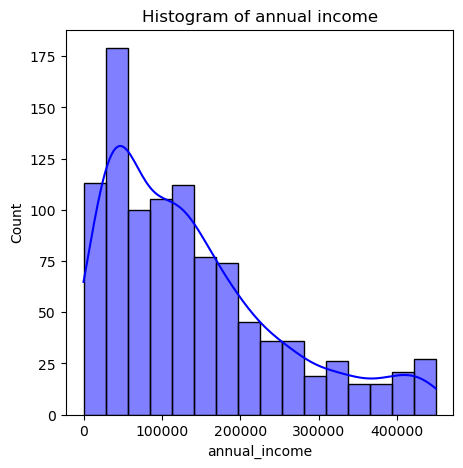

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
sns.histplot(df_customers['annual_income'], kde=True, color="blue", label='Data')
plt.title("Histogram of annual income")
plt.show()

In [ ]:
# this is a right-skewed histogram because income normally less_people = highlsx

# Handling Outliers:

In [73]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [ ]:
We have following observations from the above,

1. **Age**: min = 1, max = 135
1. **Annual Income**: min = 2, max = 447 k

Age column has outliers. Annual income also seem to have outliers in terms of minimum value because business suggested that minimum income should be atleast 100

### Outlier Detection: Annual income
Above records (with <100$ income) are outliers, after discussion with manager by mean, median because mean is a sensitive outlier so we use median

In [78]:
occupation_wise_median = df_customers.groupby("occupation")["annual_income"].median()

for index, row in df_customers.iterrows():
    if row['annual_income'] < 100:
        
        # occupation = df_customers.at[index, "occupation"]
        

        # df_customers.loc[df_customers['annual_income'] < 100, 'annual_income'] = (
        # df_customers['occupation'].map(occupation_wise_median)
        # )

        occupation = row['occupation']
        df_customers.at[index, "annual_income"] = occupation_wise_median[occupation]

In [79]:
df_cust[df_customers.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


iterrows() Method:

df_cust.iterrows() is a pandas method that allows you to iterate over each row of a DataFrame as (index, row) pairs.
index: The index of the current row in the DataFrame.
row: A pandas Series object representing the current row.

Why Use index in the Loop?

Row Identification: index is the unique identifier for each row. When you use iterrows(), it returns each row's index, allowing you to reference or modify specific rows.

## Data Visualization: Annual Income

In [80]:
avg_income_per_occupation = df_customers.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

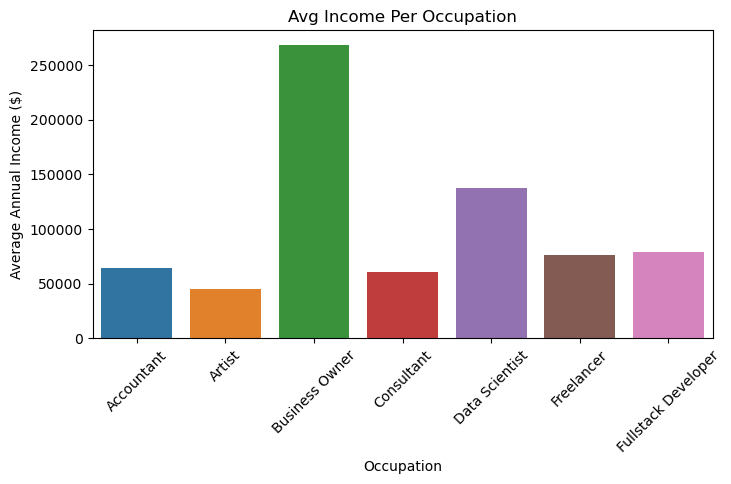

In [90]:
plt.figure(figsize = (8,4))
sns.barplot(x = avg_income_per_occupation.index , y = avg_income_per_occupation.values, palette='tab10')
plt.xticks(rotation = 45)
plt.title("Avg Income Per Occupation")
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

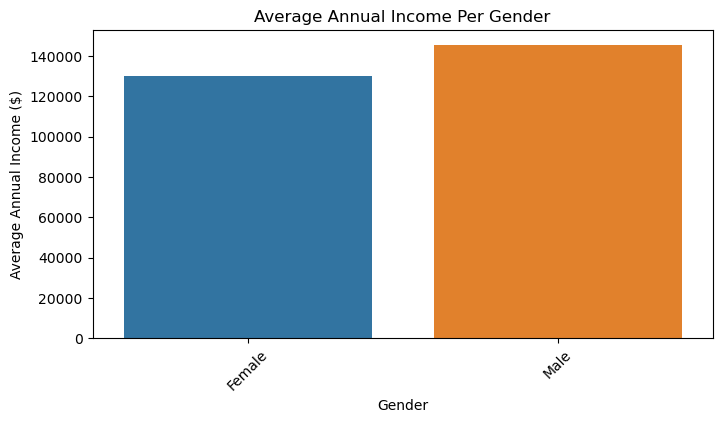

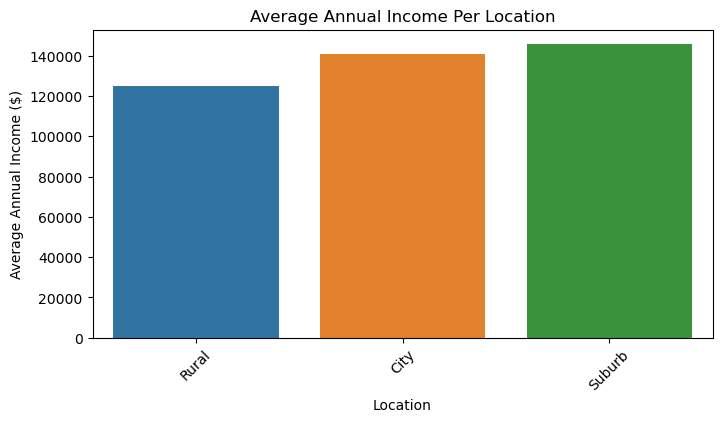

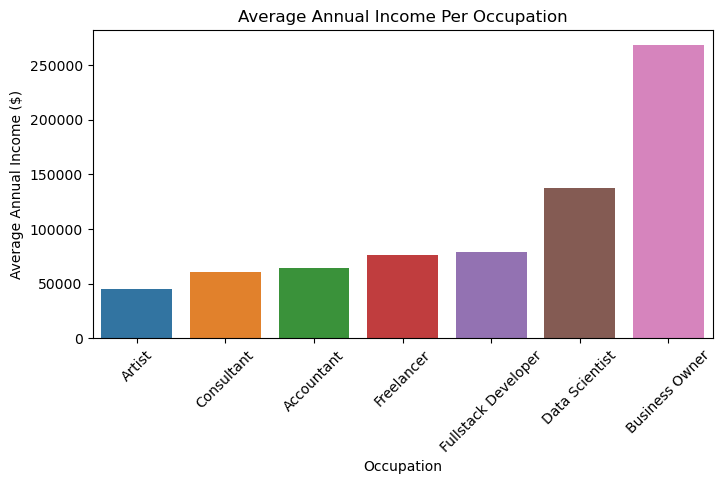

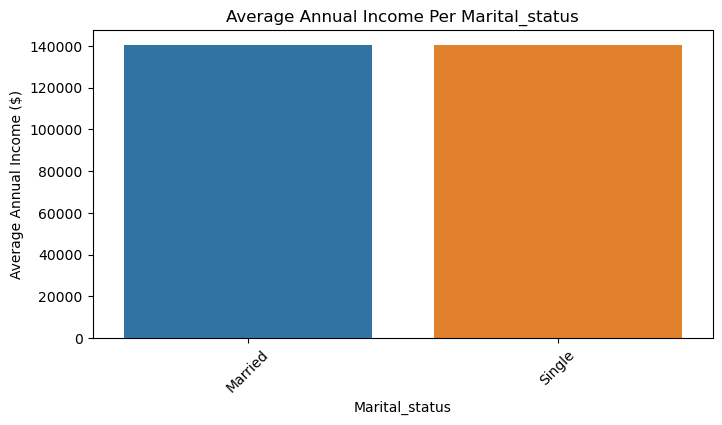

In [93]:
# List of categorical columns
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Loop through each categorical column and plot a bar chart of average annual income
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    avg_income_per_group = df_customers.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.show()

# Exercise(Handling Outlier for Age):

In [57]:
import pandas as pd

df_customers = pd.read_csv('datasets/customers.csv')
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [58]:
df_customers['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [ ]:
# Handling outlier for Age, business manager has told you that age is valid only if it is between 15 and 80 years.

In [59]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [60]:
df_customers['age'].median()

32.0

In [ ]:
# now finding age_median on basis of occupation

In [54]:
occupation_wise_median = df_customers.groupby("occupation")["age"].median()
occupation_wise_median['Freelancer'],occupation_wise_median['Business Owner'],occupation_wise_median['Consultant']

(24.0, 50.0, 46.0)

In [64]:
for index, row in df_customers.iterrows():
    if (row['age'] < 15) or (row['age'] > 80):
        df_customers.at[index, 'age'] = occupation_wise_median[row['occupation']]
        
#  iterrows woks with only index 

In [63]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,50.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [66]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,35.541000,139410.314737
std,288.819436,12.270223,112416.802007
min,1.000000,18.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,44.250000,193137.500000
max,1000.000000,64.000000,449346.000000


In [ ]:
# doing grouping of the basis of edge:

In [67]:
bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25', '26-48', '49-65']

# Now we are using the cut function of pandas to make the group
df_customers['age-group'] = pd.cut(df_customers['age'], bins = bin_edges, labels = bin_labels)

In [ ]:
# 2nd METHOD:

import pandas as pd

# Define a custom function to categorize ages
def assign_age_group(age):
    if 17 < age <= 25:
        return '18-25'
    elif 25 < age <= 48:
        return '26-48'
    elif 48 < age <= 65:
        return '49-65'
    else:
        return None  # If age is not in any range, return None or an appropriate value

# Apply the function to the 'age' column
df_customers['age-group'] = df_customers['age'].apply(assign_age_group)


In [68]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age-group
0,1,Manya Acharya,Female,50.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [ ]:
# Now I wanted a percentage of each (age-group) by a method in pandas called .value_counts:

In [72]:
age_group_count_percentage = df_customers['age-group'].value_counts(normalize=True)*100
age_group_count_percentage

age-group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

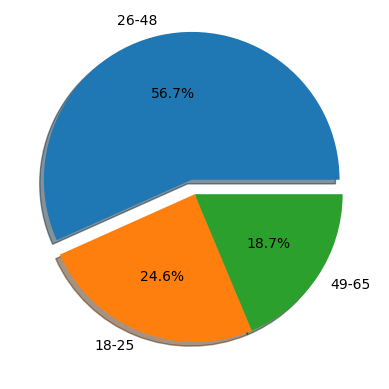

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(age_group_count_percentage, labels = age_group_count_percentage.index, autopct='%1.1f%%', shadow=True, explode=(0.1,0,0))
plt.show()

<h1 style="color:Blue">3. Analyze Gender and Location Distribution<h1>

In [87]:
customer_location_gender = df_customers.groupby(['location','gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


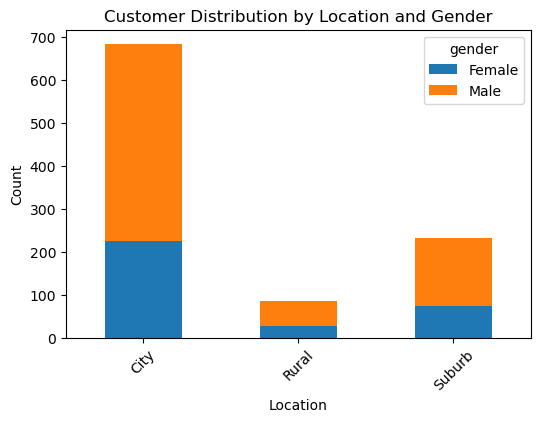

In [91]:
customer_location_gender.plot(kind='bar', stacked=True, figsize=(6,4))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

# Connecting through MySql database

In [26]:
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

In [27]:
connection = mysql.connector.connect(
    host='localhost',
    user = 'root',
    password = 'piyush2002',
    database = 'e_master_card'
)

# SQL Query
query = "SELECT * FROM customers"

# Read into DataFrame
df_customers = pd.read_sql(query, connection)
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [29]:
df_trans = pd.read_sql("SELECT * FROM transactions", connection)
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [30]:
df_cs = pd.read_sql("SELECT * FROM credit_profiles", connection)
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [31]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


## Handleing null values in all columns:

In [20]:
# checking which column have how much null values

In [32]:
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64